# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pnd
import numpy as npy
import matplotlib as mpl
import matplotlib.pyplot as pyp
import seaborn as sam

# Create two new dataframes
north_df = pnd.read_csv("NorthCallCenter.csv")
south_df = pnd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [2]:
##Took a sec to remove spaces
north_df.columns = north_df.columns.str.replace(' ', '')

north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed:0           245 non-null    int64  
 1   Branch              245 non-null    object 
 2   CallPurpose         245 non-null    object 
 3   TimeBlock           245 non-null    object 
 4   IncomingorOutgoing  245 non-null    object 
 5   Queue               245 non-null    object 
 6   RepID               245 non-null    object 
 7   Sale                245 non-null    object 
 8   LostCall            245 non-null    int64  
 9   Abandoned           245 non-null    int64  
 10  BusyMinutes         245 non-null    int64  
 11  NotReadyMinutes     245 non-null    int64  
 12  IncomingWaitTime    82 non-null     float64
 13  DuringCallWaitTime  245 non-null    int64  
 14  Calls               245 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 28.8+ KB

In [3]:
south_df.columns = south_df.columns.str.replace(' ', '')

south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed:0           314 non-null    int64  
 1   Branch              314 non-null    object 
 2   CallPurpose         314 non-null    object 
 3   TimeBlock           314 non-null    object 
 4   IncomingorOutgoing  314 non-null    object 
 5   Queue               314 non-null    object 
 6   RepID               314 non-null    object 
 7   Sale                314 non-null    object 
 8   LostCall            314 non-null    int64  
 9   Abandoned           314 non-null    int64  
 10  BusyMinutes         314 non-null    int64  
 11  NotReadyMinutes     314 non-null    int64  
 12  IncomingWaitTime    126 non-null    float64
 13  DuringCallWaitTime  314 non-null    int64  
 14  Calls               314 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 36.9+ KB

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
##Get Distinct names of reps at North Branch

#Code Used:
print(north_df['RepID'].unique())
print(north_df['RepID'].nunique())

['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']
9


#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
##Get Distinct names of reps at South Branch

#Code Used:
print(south_df['RepID'].unique())
print(south_df['RepID'].nunique())

['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']
11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
##Get North Branch mean values of BusyMinutes, NotReadyMinutes, IncomingWaitTime, DuringCallWaitTime

#Code Used:
nabm = north_df['BusyMinutes'].mean()
nanrm = north_df['NotReadyMinutes'].mean()
naiwt = north_df['IncomingWaitTime'].mean()
nadcwt = north_df['DuringCallWaitTime'].mean()


print("Average Busy Minutes:", round(nabm,2))
print("Average Not Ready Minutes:", round(nanrm,2))
print("Average Incoming Wait Time:", round(naiwt,2))
print("Average During Call Wait Time:", round(nadcwt,2))

Average Busy Minutes: 9.99
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.05
Average During Call Wait Time: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
##Get South Branch mean values of BusyMinutes, NotReadyMinutes, IncomingWaitTime, DuringCallWaitTime

#Code Used:
sabm = south_df['BusyMinutes'].mean()
sanrm = south_df['NotReadyMinutes'].mean()
saiwt = south_df['IncomingWaitTime'].mean()
sadcwt = south_df['DuringCallWaitTime'].mean()

print("Average Busy Minutes:", round(sabm,2))
print("Average Not Ready Minutes:", round(sanrm,2))
print("Average Incoming Wait Time:", round(saiwt,2))
print("Average During Call Wait Time:", round(sadcwt,2))

Average Busy Minutes: 10.05
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.0
Average During Call Wait Time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
##Temporarily combine the datasets, group by Time Block and sum

#north_df.groupby(['TimeBlock']).sum()
#south_df.groupby(['TimeBlock']).sum()

noso_df = north_df.append(south_df)
Xnoso_df = noso_df[['Branch','TimeBlock','Calls']]

#Xnoso_df.info()
Xnoso_df.groupby(['TimeBlock']).sum()

C:\Users\lahra\AppData\Local\Temp\ipykernel_15968\2509696796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  noso_df = north_df.append(south_df)


,Calls
TimeBlock,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = **[9]**
- 1b) Reps in the South Branch =  **[11]**


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = **[9.90]**
> - Not Ready Minutes = **[1.91]**
> - Incoming Wait Time = **[3.05]**
> - During Call Wait Time = **[2.97]**
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = **[10.05]**
> - Not Ready Minutes = **[1.91]**
> - Incoming Wait Time = **[3.00]**
> - During Call Wait Time = **[3.08]**
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = **[10]**
> - 10:00AM  = **[99]**
> - 11:00AM  = **[56]**
> - 12:00PM  = **[120]**
> - 1:00PM   = **[40]**
> - 2:00PM   = **[65]**
> - 3:00PM   = **[73]**
> - 4:00PM   = **[53]**
> - 5:00PM   = **[43]**



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [9]:
#ran the overall combined dataset to determine any red flags

#noso_df.info()
#noso_df.head(15)

#Index column can be dropped for the combined set.
#Incoming Wait Time sticks out.
#Data Types look OK- IncomingWaitTime could probably be an int, but it shouldnt affect anything 

print("Branch:",noso_df['Branch'].unique())
print("Call Purpose:",noso_df['CallPurpose'].unique())
print("Time Blocks:",noso_df['TimeBlock'].unique())
print("In / Out:",noso_df['IncomingorOutgoing'].unique())
print("Queue:",noso_df['Queue'].unique())
print("Rep ID:",noso_df['RepID'].unique())
print("Sale:",noso_df['Sale'].unique())

#This might be excessive, but its an easy way for me to see beforehand if everything is actually unique and if not,
#why it isn't reading as unique. 

Branch: ['North' 'South']
Call Purpose: ['Complaint' 'Sales Support' 'Product Support']
Time Blocks: ['9:00 AM' '11:00 AM' '4:00 PM' '12:00 PM' '2:00 PM' '3:00 PM' '1:00 PM'
 '10:00 AM' '5:00 PM']
In / Out: ['Incoming' 'Outgoing']
Queue: ['B' 'A' 'D' 'C']
Rep ID: ['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander' 'Kate'
 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga' 'Josh'
 'Sharon']
Sale: ['NO' 'YES ' 'YES']


#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> **Your Answer:** 
>
><span style="color:purple">There are 351 NULL values for Incoming Wait Time. If I wanted to remove these rows, I'd be removing all of the Outgoing calls and a large part of the dataset. 

In [10]:
print(north_df['IncomingWaitTime'].isnull().sum())
print(south_df['IncomingWaitTime'].isnull().sum())

print(noso_df['IncomingWaitTime'].isnull().sum())

163
188
351


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> **Your Answer:**
>
><span style="color:purple">In my inital overview, I saw that there are YES values with a space. I replaced ' ' with '' in the Sale column and checked that the values now group properly.
>
><span style="color:purple">The 'why' is because calculations won't run correctly when python/pandas believes its looking at two separate variables. Gotta love an overall =TRIM before uploading a dataset.

In [11]:
north_df.groupby(['Sale']).sum()

,Unnamed:0,LostCall,Abandoned,BusyMinutes,NotReadyMinutes,IncomingWaitTime,DuringCallWaitTime,Calls
Sale,,,,,,,,
NO,28821,5,5,2338,447,231.0,693,234
YES,1050,0,2,98,20,17.0,30,10
YES,19,0,0,11,2,2.0,4,1


In [12]:
north_df['Sale'] = north_df['Sale'].str.replace(' ', '')
north_df.groupby(['Sale']).sum()

,Unnamed:0,LostCall,Abandoned,BusyMinutes,NotReadyMinutes,IncomingWaitTime,DuringCallWaitTime,Calls
Sale,,,,,,,,
NO,28821,5,5,2338,447,231.0,693,234
YES,1069,0,2,109,22,19.0,34,11


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> **Your Answer:** 
>
><span style="color:purple">There are no duplicates in the two datasets. There is no unique identifier to the call and a query for duplicated rows returned 0.

In [13]:
print("Total Rows, Columns -", noso_df.shape)
     
Dnoso_df = noso_df[noso_df.duplicated()]
print("Duplicates Found -", Dnoso_df.shape)

Total Rows, Columns - (559, 15)
Duplicates Found - (0, 15)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> **Your Answer:** 
> 
><span style="color:purple">I removed the index-copy column (first untitled) from the combined dataset. 
>
><span style="color:purple">"Calls" could techically be removed in place of an overall count, but its not hurting anybody and count columns like that are helpful for at-a-glance understanding not just in python, but pivots, etc.
> 
><span style="color:purple">While we might not be querying on every datapoint, the set would have to be preeety big before I'd start trashing columns for the heck of it.

In [14]:
noso_df.drop(columns=noso_df.columns[0], axis=1, inplace=True)

noso_df.head(15)

,Branch,CallPurpose,TimeBlock,IncomingorOutgoing,Queue,RepID,Sale,LostCall,Abandoned,BusyMinutes,NotReadyMinutes,IncomingWaitTime,DuringCallWaitTime,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [15]:
#I used noso_df instead of df because I had already combined the dataset above for cleaning and want my work
#there carried over to the Manipulation project.

noso_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Branch              559 non-null    object 
 1   CallPurpose         559 non-null    object 
 2   TimeBlock           559 non-null    object 
 3   IncomingorOutgoing  559 non-null    object 
 4   Queue               559 non-null    object 
 5   RepID               559 non-null    object 
 6   Sale                559 non-null    object 
 7   LostCall            559 non-null    int64  
 8   Abandoned           559 non-null    int64  
 9   BusyMinutes         559 non-null    int64  
 10  NotReadyMinutes     559 non-null    int64  
 11  IncomingWaitTime    208 non-null    float64
 12  DuringCallWaitTime  559 non-null    int64  
 13  Calls               559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 65.5+ KB


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = **[Brent]**
- South Branch = **[Eric]**


In [16]:
noso_df.groupby(["RepID", "Branch"]).sum().sort_values(by=["Calls"], ascending=False)

,,LostCall,Abandoned,BusyMinutes,NotReadyMinutes,IncomingWaitTime,DuringCallWaitTime,Calls
RepID,Branch,,,,,,,
Brent,North,0,1,362,71,17.0,117,37
Eric,South,0,0,361,54,47.0,112,35
Randy,South,3,1,320,66,47.0,98,33
Sandy,South,1,0,325,60,34.0,100,32
Helga,South,0,2,292,58,36.0,95,31
Lilly,North,0,2,307,59,37.0,88,30
Todd,North,1,0,296,58,21.0,97,29
Duke,North,2,0,292,56,39.0,85,29
George,South,0,0,298,53,41.0,87,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = **[8.54%]**
- South Branch = **[3.17%]**
- Company Wide =**[5.29%]**
- Do any of these fall out of the optimal range of 2-5%? **[North Branch and Company Wide]**


In [17]:
# Abandoned / Incoming Calls = __(%)

nbc = north_df.loc[north_df['IncomingorOutgoing'] =='Incoming', 'Calls'].sum()
sbc = south_df.loc[south_df['IncomingorOutgoing'] =='Incoming', 'Calls'].sum()

nbca = north_df['Abandoned'].sum()
sbca = south_df['Abandoned'].sum()

nsc = noso_df.loc[noso_df['IncomingorOutgoing'] =='Incoming', 'Calls'].sum()
nsca = noso_df['Abandoned'].sum()

print("North Branch Abandonment Rate:", round((nbca/nbc)*100,2),"%")
print("South Branch Abandonment Rate:", round((sbca/sbc)*100,2),"%")
print("Company Wide Abandonment Rate:", round((nsca/nsc)*100,2),"%")

North Branch Abandonment Rate: 8.54 %
South Branch Abandonment Rate: 3.17 %
Company Wide Abandonment Rate: 5.29 %


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = **[33 out of 82 total calls. 40.0 % efficiently answered]**
- South Branch = **[48 out of 126 total calls. 38.0 % efficiently answered]**
- Company Wide = **[81 out of 208 total calls. 39.0 % efficiently answered]**

In [18]:
# Calls with <=2 wait time / calls = __(%)

nbeac = noso_df.loc[(noso_df['Branch'] == 'North') & (noso_df['IncomingWaitTime'] <=2), 'Calls'].sum()
nbtc = noso_df.loc[(noso_df['Branch'] == 'North') & (noso_df['IncomingorOutgoing'] == 'Incoming'), 'Calls'].sum()

sbeac = noso_df.loc[(noso_df['Branch'] == 'South') & (noso_df['IncomingWaitTime'] <=2), 'Calls'].sum()
sbtc = noso_df.loc[(noso_df['Branch'] == 'South') & (noso_df['IncomingorOutgoing'] == 'Incoming'), 'Calls'].sum()

ceac = noso_df.loc[noso_df['IncomingWaitTime'] <=2, 'Calls'].sum()
ctc = noso_df.loc[noso_df['IncomingorOutgoing'] == 'Incoming', 'Calls'].sum()


print("North Branch EAC:",nbeac,"out of",nbtc,"total calls.",round(nbeac/nbtc,2)*100,"% efficiently answered.")
print("South Branch EAC:",sbeac,"out of",sbtc,"total calls.",round(sbeac/sbtc,2)*100,"% efficiently answered.")
print("Company Wide EAC:",ceac,"out of",ctc,"total calls.",round(ceac/ctc,2)*100,"% efficiently answered.")

North Branch EAC: 33 out of 82 total calls. 40.0 % efficiently answered.
South Branch EAC: 48 out of 126 total calls. 38.0 % efficiently answered.
Company Wide EAC: 81 out of 208 total calls. 39.0 % efficiently answered.


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = **[3.05]**
- South Branch in seconds = **[3.00]**
- Company Wide in seconds = **[3.02]**


In [19]:
avgNB = noso_df.loc[noso_df['Branch'] == 'North', 'IncomingWaitTime'].mean()
avgSB = noso_df.loc[noso_df['Branch'] == 'South', 'IncomingWaitTime'].mean()
avgCW = noso_df['IncomingWaitTime'].mean()

print("North Branch, in seconds:",round(avgNB,2))
print("South Branch, in seconds:",round(avgSB,2))
print("Company Wide, in seconds:",round(avgCW,2))

North Branch, in seconds: 3.05
South Branch, in seconds: 3.0
Company Wide, in seconds: 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?


> Chart style you chose and why: 
>
> **[I chose a bar chart here because it shows easily at a glance which queue is struggling most with abandonment rate.]**

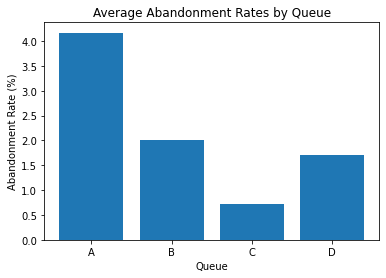

In [20]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import matplotlib.pyplot as pyp

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = noso_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]*100).round(2)

    
#Your Code Here:

pyp.title("Average Abandonment Rates by Queue")
pyp.xlabel("Queue")
pyp.ylabel("Abandonment Rate (%)")

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

pyp.bar(range(len(abandonment_rates)), values, tick_label=names)
pyp.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

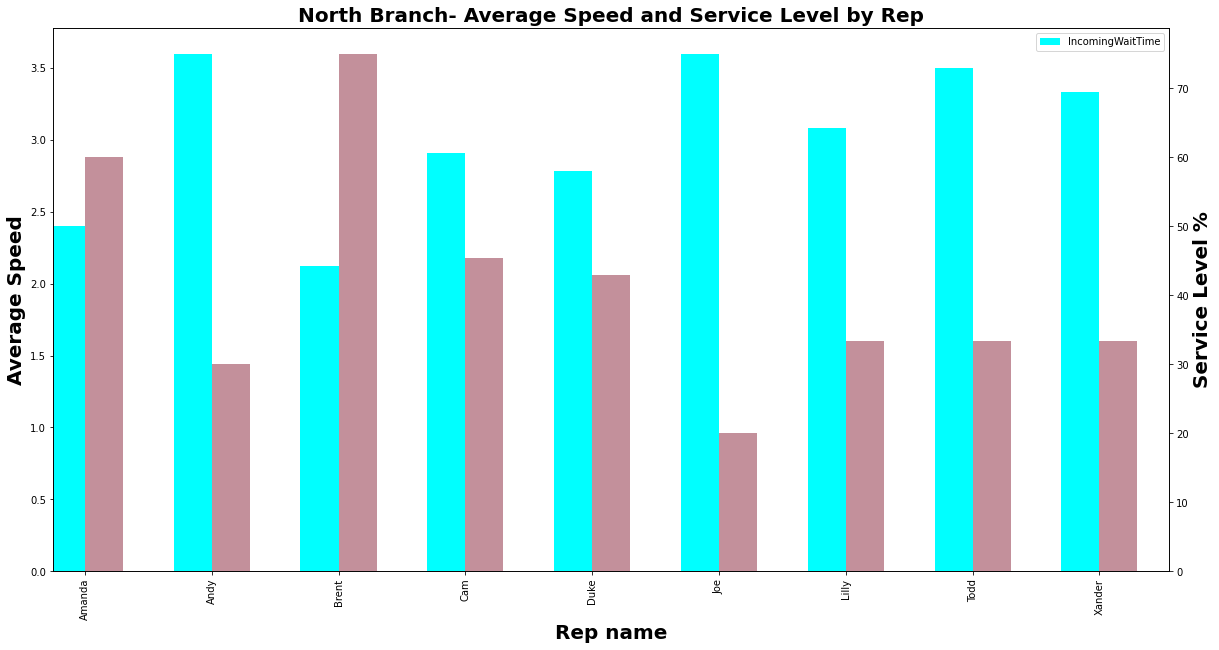

In [45]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_df_plt = north_df.groupby("RepID")["IncomingWaitTime"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["IncomingWaitTime"] <= 2.0]
quick_reps = quick_calls[["RepID", "Calls"]]
quick_stats = quick_reps.groupby(["RepID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["IncomingorOutgoing"] == "Incoming"]
rep_calls = total_calls_in[["RepID", "Calls"]]     
total_stats = rep_calls.groupby(["RepID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pnd.merge(quick_stats, total_stats, on="RepID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#Your Code Here:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

north_df_plt.plot(kind='bar', color='#00FFFF', ax=ax, width=0.3, position=1)
service_level["Service Level %"].plot(kind='bar', color='#C3909B', ax=ax2, width=0.3, position=0)

ax.set_ylabel('Average Speed',color = 'black', fontsize = 20, fontweight = 'bold')
ax2.set_ylabel('Service Level %',color = 'black', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Rep name',color = 'black', fontsize = 20, fontweight = 'bold')

plt.title('North Branch- Average Speed and Service Level by Rep', color = 'black', fontsize = 20, fontweight = 'bold')
plt.savefig('bar_serviceLevel_avgSpeed.png')
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

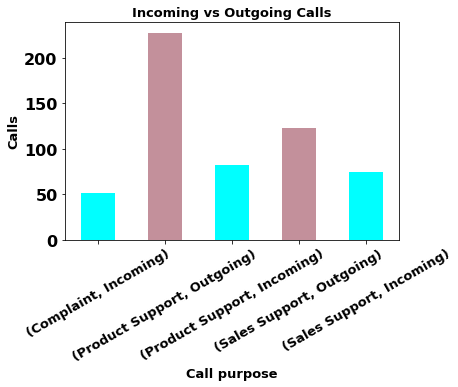

In [53]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = noso_df.groupby("CallPurpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["IncomingorOutgoing"].value_counts()

#print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#Your Code Here:

import matplotlib.pyplot as plt



width=1
purpose_counts.plot.bar(color=['#00FFFF', '#C3909B'])

plt.xlabel("Call purpose", color = 'black', fontsize = 13, fontweight = 'bold')
plt.ylabel('Calls', color = 'black', fontsize = 13, fontweight = 'bold')
plt.title('Incoming vs Outgoing Calls', color = 'black', fontsize = 13, fontweight = 'bold')

plt.xticks(rotation=30, color = 'black',fontsize=13, fontweight='bold')
plt.yticks(color = 'black',fontsize=16, fontweight='bold')
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?


> Your Answer: 
>
> **[It looks as if the South Branch is operating more efficiently with about a third of the abandonment rate of the North Branch. Other statistics, like speed of answer, are similar to each other for both branches.]**


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?


> Your Answer: 
>
> **[I believe North Branch would benefit from extra help. They are performing individually in a similar way to their South Branch colleagues, but are less two reps - which could explain the increased abandonment rate at North Branch.]**

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [38]:
# Create your Bonus Mission visualization here!
#call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: